# 0. Importing libraries

In [6]:
import pandas as pd

from datetime import timedelta
from loading_api_key import *
from loading_data import *
from historic import *
from feature_engineering import *
from modelling import *
from visualizing import *
from predicting import *

import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [7]:
api_key = load_api_key()['API_KEY']

In [8]:
today = pd.Timestamp.today().normalize()
one_week_ahead = today + timedelta(weeks=1)
two_week_ahead = today + timedelta(weeks=2)
three_week_ahead = today + timedelta(weeks=3)
four_week_ahead = today + timedelta(weeks=4)

yesterday = today - timedelta(days=1)
two_day_ago = today - timedelta(days=2)
one_week_ago = today - timedelta(weeks=1)
two_week_ago = today - timedelta(weeks=2)
three_week_ago = today - timedelta(weeks=3)
four_week_ago = today - timedelta(weeks=4)
one_month_ago = today - timedelta(days=30)
six_month_ago = today - timedelta(days=180)
one_year_ago = today - timedelta(weeks=52)
five_year_ago = today - timedelta(weeks=260)

# 1. Loading S&P500 data

In [9]:
sp_prices = load_sp()

In [10]:
sp_prices

,ds,y,day_of_week,month
0,2020-01-31,51.928,4,1
1,2020-02-03,52.419,0,2
2,2020-02-04,53.394,1,2
3,2020-02-05,53.864,2,2
4,2020-02-06,54.336,3,2
...,...,...,...,...
1306,2025-02-19,112.105,2,2
1307,2025-02-20,112.105,3,2
1308,2025-02-21,110.830,4,2
1309,2025-02-24,109.390,0,2


# 2. Historic data

In [ ]:
historic_data(two_day_ago, sp_prices, 'one day')
historic_data(one_week_ago, sp_prices, 'one week')
historic_data(one_month_ago, sp_prices, 'one month')
historic_data(six_month_ago, sp_prices, 'six months')
historic_data(one_year_ago, sp_prices, 'one year')
historic_data(five_year_ago, sp_prices, 'five years')
historic_data(sp_prices['ds'].min(), sp_prices, 'all time')

# 3. Feature engineering

In [ ]:
aapl_future, aapl = load_stock_data('AAPL', 'aapl', api_key, periods=36)
nvda_future, nvda = load_stock_data('NVDA', 'nvda', api_key, periods=36)
tsla_future, tsla = load_stock_data('TSLA', 'tsla', api_key, periods=36)

16:48:41 - cmdstanpy - INFO - Chain [1] start processing
16:48:42 - cmdstanpy - INFO - Chain [1] done processing
16:48:42 - cmdstanpy - INFO - Chain [1] start processing
16:48:42 - cmdstanpy - INFO - Chain [1] done processing
16:48:43 - cmdstanpy - INFO - Chain [1] start processing
16:48:43 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
df_to_merge = [aapl, nvda, tsla]
sp_prices_merged = merge_sp_features(sp_prices, df_to_merge)

# 4. Modelling

In [ ]:
future_cols = ['day_of_week', 'month', 'aapl', 'nvda', 'tsla']
future_dfs = [aapl_future, nvda_future, tsla_future]
forecast = modelling(sp_prices_merged, future_cols=future_cols, future_dfs=future_dfs, periods=36)

16:48:44 - cmdstanpy - INFO - Chain [1] start processing
16:48:44 - cmdstanpy - INFO - Chain [1] done processing


# 5. Visualizing

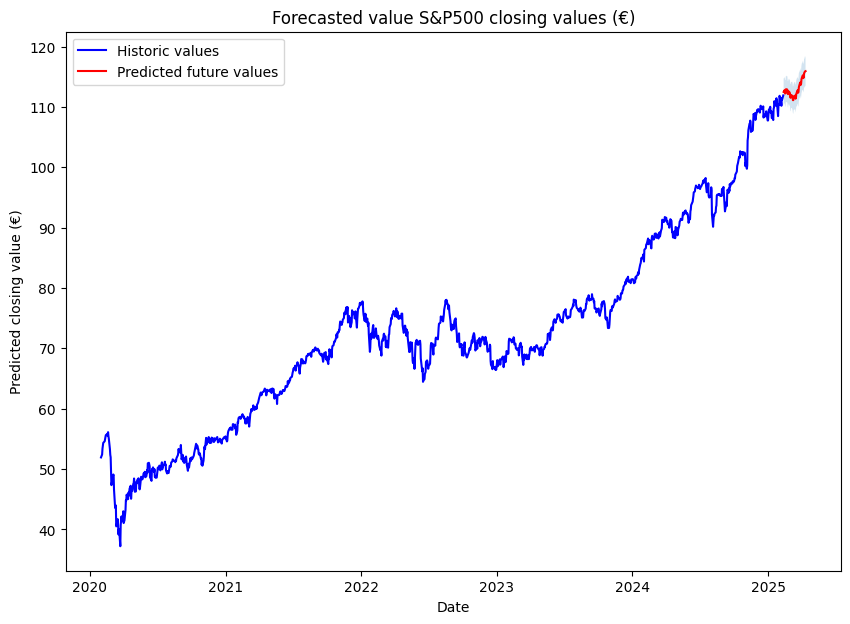

In [6]:
visualization(sp_prices, forecast)

# 6. Predictions

In [8]:
prediction_today = forecast[forecast['ds'] == today]
prediction_one_week = forecast[forecast['ds'] == one_week_ahead]
prediction_two_week = forecast[forecast['ds'] == two_week_ahead]
prediction_three_week = forecast[forecast['ds'] == three_week_ahead]
prediction_four_week = forecast[forecast['ds'] == four_week_ahead]

In [9]:
increase_today = calculate_increase(prediction_today, sp_prices)
increase_one_week = calculate_increase(prediction_one_week, sp_prices)
increase_two_week = calculate_increase(prediction_two_week, sp_prices)
increase_three_week = calculate_increase(prediction_three_week, sp_prices)
increase_four_week = calculate_increase(prediction_four_week, sp_prices)

In [10]:
lower_increase_today = calculate_lower_increase(prediction_today, sp_prices)
lower_increase_one_week = calculate_lower_increase(prediction_one_week, sp_prices)
lower_increase_two_week = calculate_lower_increase(prediction_two_week, sp_prices)
lower_increase_three_week = calculate_lower_increase(prediction_three_week, sp_prices)
lower_increase_four_week = calculate_lower_increase(prediction_four_week, sp_prices)

In [11]:
upper_increase_today = calculate_upper_increase(prediction_today, sp_prices)
upper_increase_one_week = calculate_upper_increase(prediction_one_week, sp_prices)
upper_increase_two_week = calculate_upper_increase(prediction_two_week, sp_prices)
upper_increase_three_week = calculate_upper_increase(prediction_three_week, sp_prices)
upper_increase_four_week = calculate_upper_increase(prediction_four_week, sp_prices)

In [12]:
print_increases(prediction_today, increase_today, lower_increase_today, upper_increase_today)
print_increases(prediction_one_week, increase_one_week, lower_increase_one_week, upper_increase_one_week)
print_increases(prediction_two_week, increase_two_week, lower_increase_two_week, upper_increase_two_week)
print_increases(prediction_three_week, increase_three_week, lower_increase_three_week, upper_increase_three_week)
print_increases(prediction_four_week, increase_four_week, lower_increase_four_week, upper_increase_four_week)

Prediction for 11-02-2025: €112.48. This represents an increase of 0.52%
For this prediction, the lower limit is €110.35. This represent an increase of -1.41%
The upper limit is €114.76. This represents an increase of 2.49%

Prediction for 18-02-2025: €112.91. This represents an increase of 0.89%
For this prediction, the lower limit is €110.76. This represent an increase of -1.03%
The upper limit is €115.05. This represents an increase of 2.74%

Prediction for 25-02-2025: €112.55. This represents an increase of 0.57%
For this prediction, the lower limit is €110.27. This represent an increase of -1.48%
The upper limit is €114.46. This represents an increase of 2.24%

Prediction for 04-03-2025: €111.94. This represents an increase of 0.03%
For this prediction, the lower limit is €109.82. This represent an increase of -1.89%
The upper limit is €114.15. This represents an increase of 1.97%

Prediction for 11-03-2025: €111.73. This represents an increase of -0.15%
For this prediction, the l

# 7. Comparing predictions to actual values

In [13]:
compare_predictions_to_actual(sp_prices, prediction_today, today, yesterday, '1-day', 'Predicted closing values 1_day.csv', '1_day_error.csv')
compare_predictions_to_actual(sp_prices, prediction_one_week, one_week_ahead, one_week_ago, '1-week', 'Predicted closing values 1_week.csv', '1_week_error.csv')
compare_predictions_to_actual(sp_prices, prediction_two_week, two_week_ahead, two_week_ago, '2-week', 'Predicted closing values 2_week.csv', '2_week_error.csv')
compare_predictions_to_actual(sp_prices, prediction_three_week, three_week_ahead, three_week_ago, '3-week', 'Predicted closing values 3_week.csv', '3_week_error.csv')
compare_predictions_to_actual(sp_prices, prediction_four_week, four_week_ahead, four_week_ago, '4-week', 'Predicted closing values 4_week.csv', '4_week_error.csv')

Average error for 1-day predictions: €0.42
Average error for 1-day predictions: 0.38%

Average error for 1-week predictions: €nan
Average error for 1-week predictions: nan%

Average error for 2-week predictions: €nan
Average error for 2-week predictions: nan%

Average error for 3-week predictions: €nan
Average error for 3-week predictions: nan%

Average error for 4-week predictions: €nan
Average error for 4-week predictions: nan%

